# Introdução

[-6.16961099  2.44217542 -1.24544522  5.70717167  5.59951616 -4.54814789
 -4.4707149   6.03744355  9.16278707  7.51865269 -2.8436546 ]


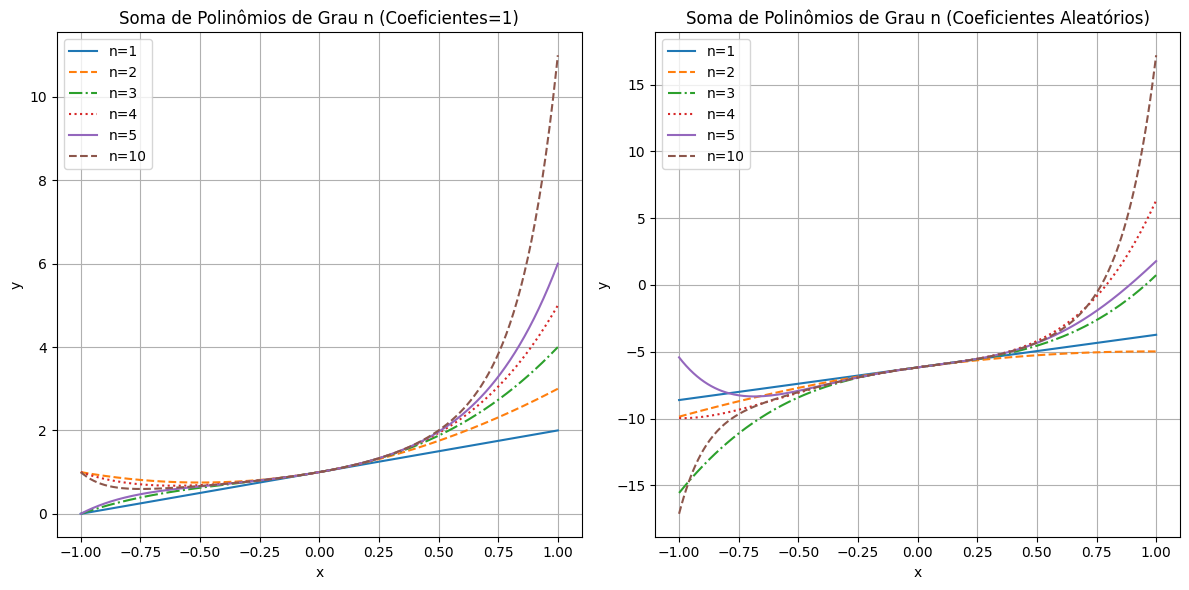

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

def plot_sum_of_polynomials(n_values):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    x = np.linspace(-1, 1, 400)
    line_styles = ['-', '--', '-.', ':']  # Estilos de linha

    max_n = max(n_values)
    # coefficients = np.random.rand(max_n + 1)  # Gera coeficientes aleatórios uma única vez
    coefficients = np.random.uniform(low=-10, high=10, size=max_n + 1)

    print(coefficients)

    # Primeiro gráfico com coeficientes=1
    for index, n in enumerate(n_values):
        y = np.zeros_like(x)
        for i in range(n + 1):
            y += x ** i  # Soma cada termo x^i para i variando de 0 até n

        axs[0].plot(x, y, label=f"n={n}", linestyle=line_styles[index % len(line_styles)])

    axs[0].set_title("Soma de Polinômios de Grau n (Coeficientes=1)")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].legend()
    axs[0].grid(True)

    # Segundo gráfico com coeficientes aleatórios
    for index, n in enumerate(n_values):
        y = np.zeros_like(x)
        for i in range(n + 1):
            y += coefficients[i] * (x ** i)  # Soma cada termo coef[i]*x^i para i variando de 0 até n

        axs[1].plot(x, y, label=f"n={n}", linestyle=line_styles[index % len(line_styles)])

    axs[1].set_title("Soma de Polinômios de Grau n (Coeficientes Aleatórios)")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Chame a função com diferentes valores de n para observar o comportamento
plot_sum_of_polynomials([1, 2, 3, 4, 5, 10])


# Vandermonde

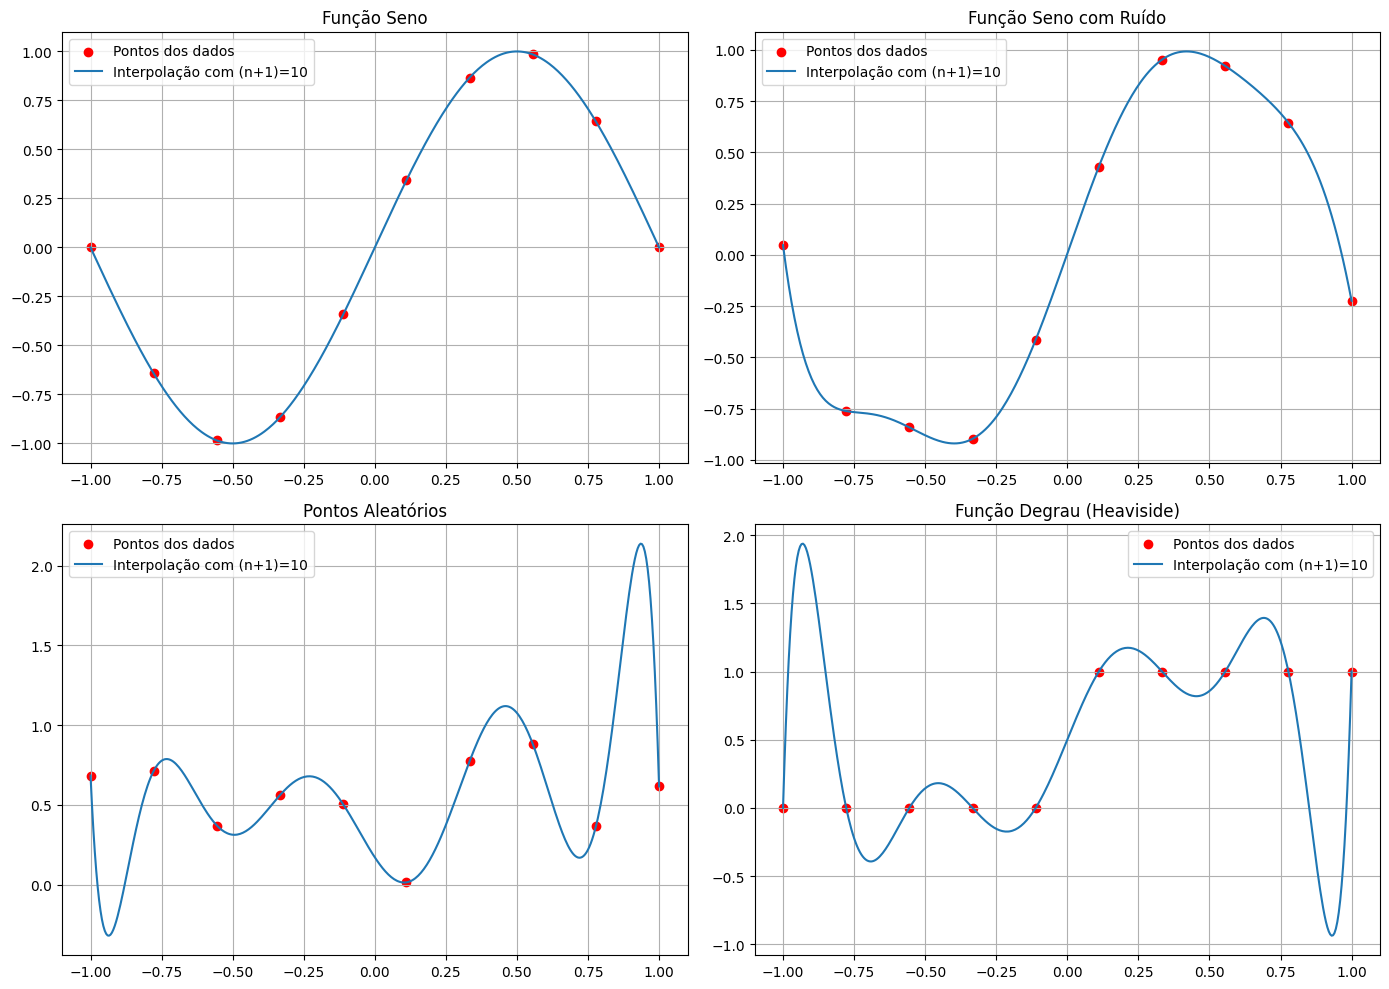

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

np.random.seed(1234)

def matriz_vandermonde(x):
    n = len(x)
    V = np.zeros((n, n))
    for i in range(n):
        V[:, i] = x ** i
    return V

def plotar_com_interpolacao(x, y, n, ax):
    # Plotar pontos originais
    ax.scatter(x, y, label='Pontos dos dados', color='red')

    # Matriz de Vandermonde para interpolação
    V = matriz_vandermonde(x)
    coef = solve(V, y)

    # Gerar a função polinomial com base nos coeficientes
    def f(x):
        return sum(c * x**i for i, c in enumerate(coef))

    # Plotar curva interpolada
    x_fino = np.linspace(min(x), max(x), 400)
    y_fino = f(x_fino)
    ax.plot(x_fino, y_fino, label=f'Interpolação com (n+1)={len(x)}', linestyle='-')

    # # Gerar 2n pontos para uma melhor interpolação
    # x2n = np.linspace(min(x), max(x), 2 * n)
    # y2n = f(x2n)

    # # Refazer interpolação com 2n pontos
    # V2n = matriz_vandermonde(x2n)
    # coef2n = solve(V2n, y2n)
    # def f2n(x):
    #     return sum(c * x**i for i, c in enumerate(coef2n))

    # # Plotar curva interpolada com 2n pontos
    # y_fino_2n = f2n(x_fino)
    # ax.plot(x_fino, y_fino_2n, label=f'Interpolação com n={2*n}', linestyle='--')

    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
x_vals = np.linspace(-1, 1, 10)
n = len(x_vals)

# 1. Função Seno
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao(x_vals, y1, n, axs[0, 0])
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao(x_vals, y2, n, axs[0, 1])
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao(x_vals, y3, n, axs[1, 0])
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao(x_vals, y4, n, axs[1, 1])
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()


# Abordagem de Lagrange

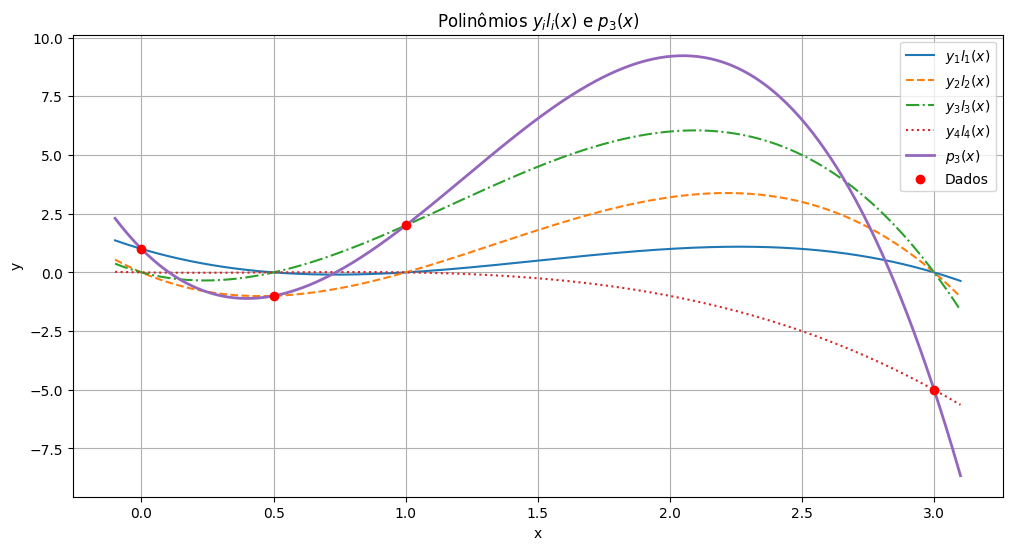

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

# Definir os dados da tabela
x_data = np.array([0, 1/2, 1, 3])
y_data = np.array([1, -1, 2, -5])

# Definir a função para calcular cada l_i(x)
def l_i(x, i, x_data):
    l = 1
    for j in range(len(x_data)):
        if j != i:
            l *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return l

# Definir a função para calcular p_n(x)
def p_n(x, x_data, y_data):
    p = 0
    for i in range(len(y_data)):
        p += y_data[i] * l_i(x, i, x_data)
    return p

# Criar pontos x para a plotagem
x_points = np.linspace(min(x_data) - 0.1, max(x_data) + 0.1, 400)

# Configuração de estilo de linha
line_styles = ['-', '--', '-.', ':']

# Plotar cada y_i * l_i(x)
plt.figure(figsize=(12, 6))

for i in range(len(x_data)):
    y_points = [y_data[i] * l_i(x, i, x_data) for x in x_points]
    plt.plot(x_points, y_points, label=f"$y_{i+1}l_{i+1}(x)$", linestyle=line_styles[i % len(line_styles)])

# Plotar p_n(x)
y_points = [p_n(x, x_data, y_data) for x in x_points]
plt.plot(x_points, y_points, label=f"$p_3(x)$", linestyle=line_styles[(len(x_data)) % len(line_styles)], linewidth=2)

# Adicionar pontos de dados em vermelho
plt.scatter(x_data, y_data, color='red', zorder=5, label='Dados')

# Configurações de plotagem
plt.title("Polinômios $y_il_i(x)$ e $p_3(x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-2e73ddabd684>:17: RuntimeWarning: invalid value encountered in divide
  termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)


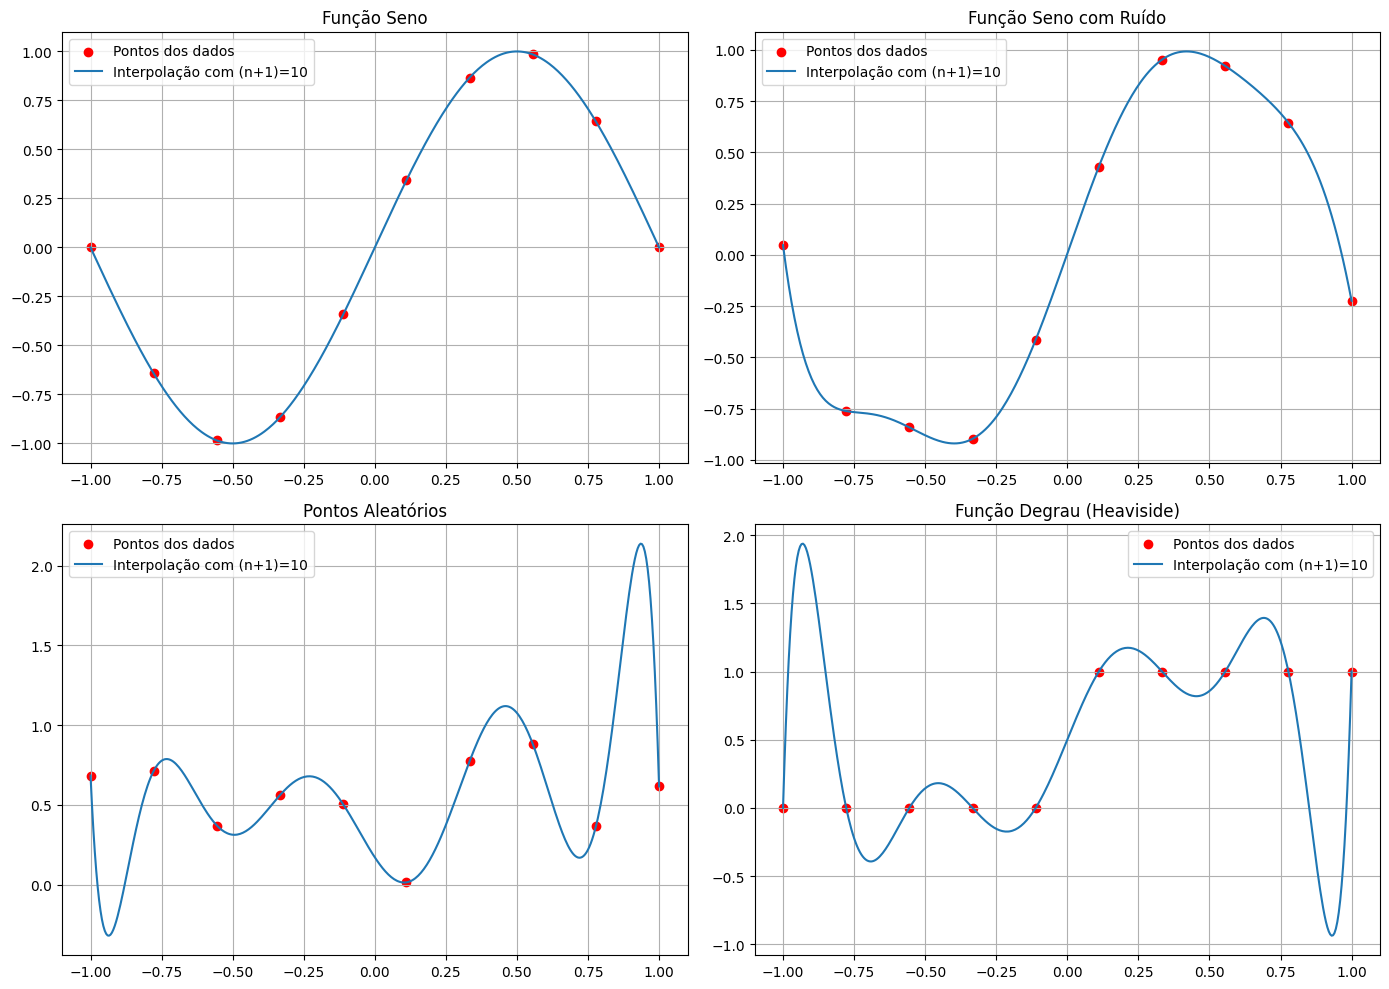

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

def calcular_wi(x, xi):
    termos = [(xi - xj) for xj in x if xj != xi]
    return 1 / np.prod(termos)

def lagrange_interpolacao(x, y, x_fino):
    l_x = np.prod([(x_fino - xi) for xi in x], axis=0)
    somatorio = 0
    for i in range(len(x)):
        wi = calcular_wi(x, x[i])
        # termo = wi * y[i] * l_x / (x_fino - x[i])
        denominador = (x_fino - x[i])
        termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)
        somatorio += termo
    return somatorio

def plotar_com_interpolacao_new(x, y, n, ax):
    ax.scatter(x, y, label='Pontos dos dados', color='red')

    x_fino = np.linspace(min(x), max(x), 400)
    y_fino = lagrange_interpolacao(x, y, x_fino)

    # add
    for xi, yi in zip(x, y):
        y_fino[x_fino == xi] = yi

    ax.plot(x_fino, y_fino, label=f'Interpolação com (n+1)={len(x)}', linestyle='-')

    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
x_vals = np.linspace(-1, 1, 10)
n = len(x_vals)

# 1. Função Seno
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao_new(x_vals, y1, n, axs[0, 0])
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao_new(x_vals, y2, n, axs[0, 1])
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao_new(x_vals, y3, n, axs[1, 0])
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao_new(x_vals, y4, n, axs[1, 1])
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()

<ipython-input-20-413843b2ad78>:18: RuntimeWarning: invalid value encountered in divide
  termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)


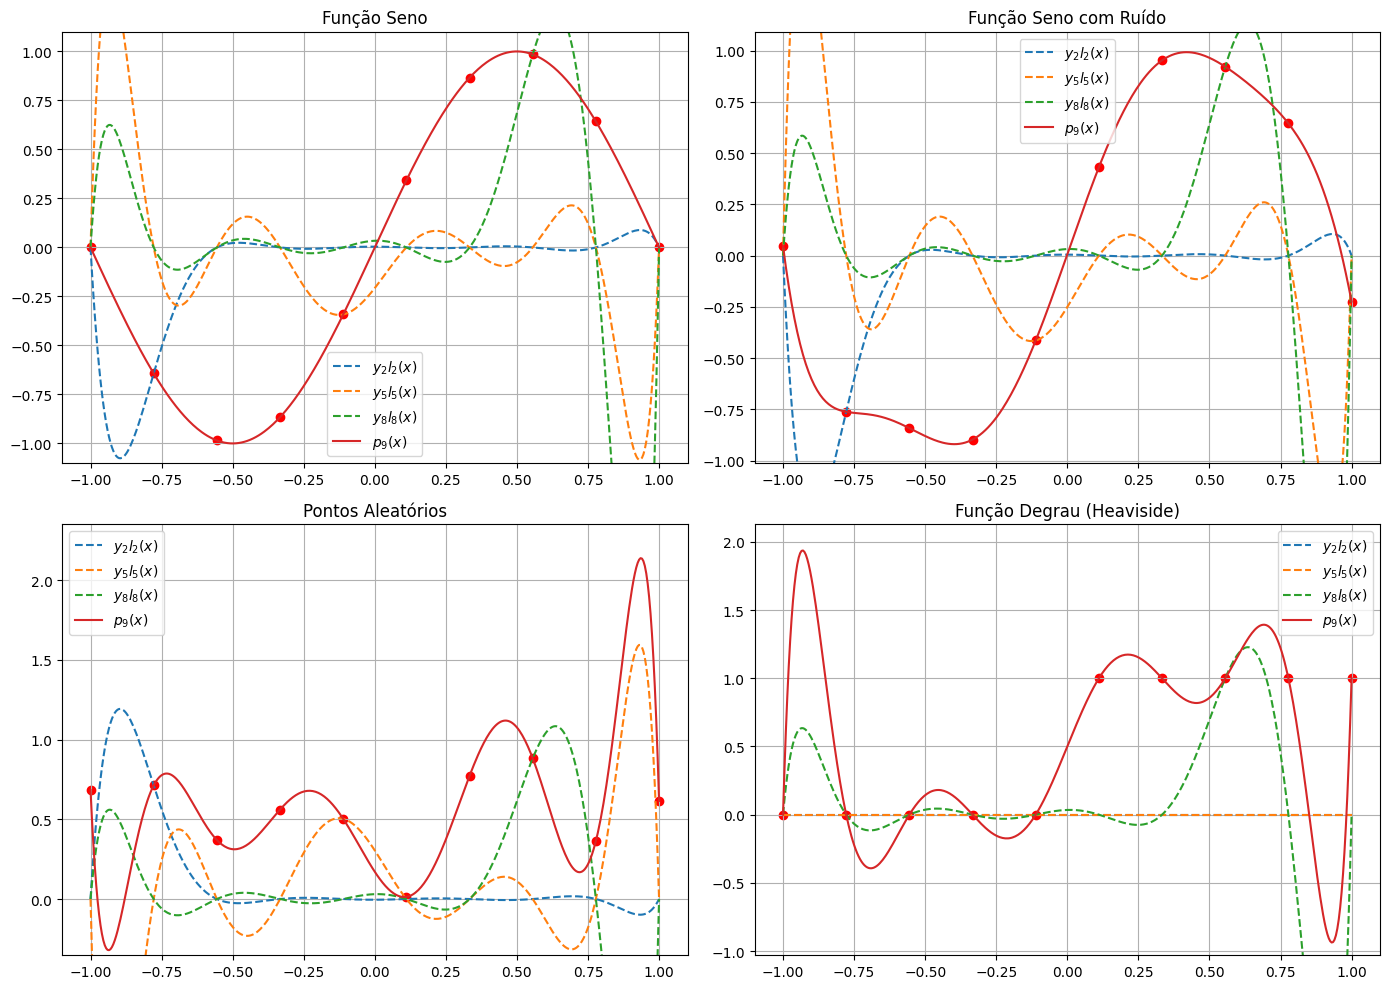

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

def calcular_wi(x, xi):
    termos = [(xi - xj) for xj in x if xj != xi]
    return 1 / np.prod(termos)

def lagrange_interpolacao(x, y, x_fino):
    l_x = np.prod([(x_fino - xi) for xi in x], axis=0)
    somatorio = 0
    termos_separados = []

    for i in range(len(x)):
        wi = calcular_wi(x, x[i])
        denominador = (x_fino - x[i])
        termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)
        termos_separados.append(termo)
        somatorio += termo

    return somatorio, termos_separados

def plotar_com_interpolacao_new(x, y, ax, indices_a_mostrar=None):
    ax.scatter(x, y, color='red')

    x_fino = np.linspace(min(x), max(x), 400)
    y_fino, termos_separados = lagrange_interpolacao(x, y, x_fino)

    # add
    for xi, yi in zip(x, y):
        y_fino[x_fino == xi] = yi

    for i, termo in enumerate(termos_separados):
        if indices_a_mostrar is None or i+1 in indices_a_mostrar:
            ax.plot(x_fino, termo, label=f"$y_{i+1}l_{i+1}(x)$", linestyle='--')
            # ax.plot(x_fino, termo, label=f"$y_{{i+1}}l_{{i+1}}(x)$", linestyle='--')

    ax.plot(x_fino, y_fino, label=f"$p_{{9}}(x)$", linestyle='-')

    # Configura o limite do eixo y baseado no mínimo e máximo de y_fino
    ax.set_ylim(1.1*min(y_fino), 1.1*max(y_fino))

    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
x_vals = np.linspace(-1, 1, 10)  # Mantido em 10 pontos
n = len(x_vals)
indices_a_mostrar = [2, 5, 8]  # Índices dos termos y_i * l_i(x) para serem mostrados

# 1. Função Seno
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao_new(x_vals, y1, axs[0, 0], indices_a_mostrar)
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao_new(x_vals, y2, axs[0, 1], indices_a_mostrar)
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao_new(x_vals, y3, axs[1, 0], indices_a_mostrar)
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao_new(x_vals, y4, axs[1, 1], indices_a_mostrar)
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()


# Fenômeno de Runge

In [ ]:
# Vandermonde

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
x_vals = np.linspace(-1, 1, 20)
n = len(x_vals)

# 1. Função Seno
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao(x_vals, y1, n, axs[0, 0])
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao(x_vals, y2, n, axs[0, 1])
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao(x_vals, y3, n, axs[1, 0])
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao(x_vals, y4, n, axs[1, 1])
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()

# Lagrange

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
x_vals = np.linspace(-1, 1, 10)
n = len(x_vals)

# 1. Função Seno
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao_new(x_vals, y1, n, axs[0, 0])
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao_new(x_vals, y2, n, axs[0, 1])
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao_new(x_vals, y3, n, axs[1, 0])
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao_new(x_vals, y4, n, axs[1, 1])
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()

<ipython-input-10-2e73ddabd684>:17: RuntimeWarning: invalid value encountered in divide
  termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)


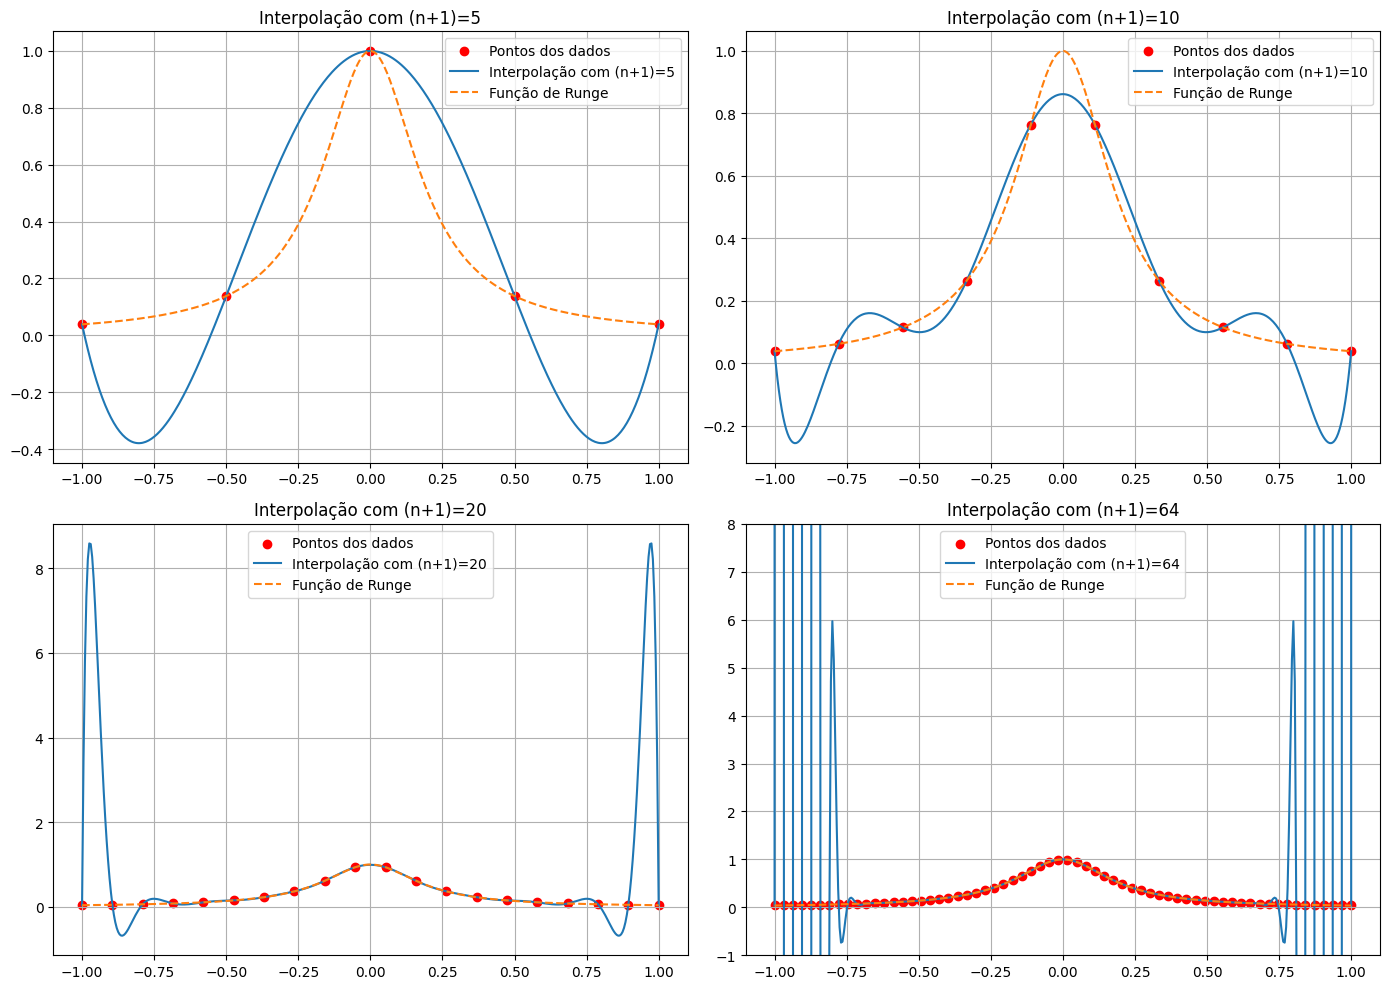

In [ ]:
def runge_function(x):
    return 1 / (1 + 25 * x ** 2)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Valores diferentes de n
n_values = [5, 10, 20, 64]

for ax, n in zip(axs.flatten(), n_values):
    x_vals = np.linspace(-1, 1, n)
    y_vals = runge_function(x_vals)
    plotar_com_interpolacao_new(x_vals, y_vals, n, ax) # A função original de interpolação

    # Plotar a função de Runge verdadeira
    x_fino = np.linspace(-1, 1, 400)
    y_fino_true = runge_function(x_fino)
    ax.plot(x_fino, y_fino_true, label='Função de Runge', linestyle='--')

    ax.set_title(f'Interpolação com (n+1)={n}')
    ax.legend()

plt.tight_layout()
plt.ylim(-1,8)
plt.show()

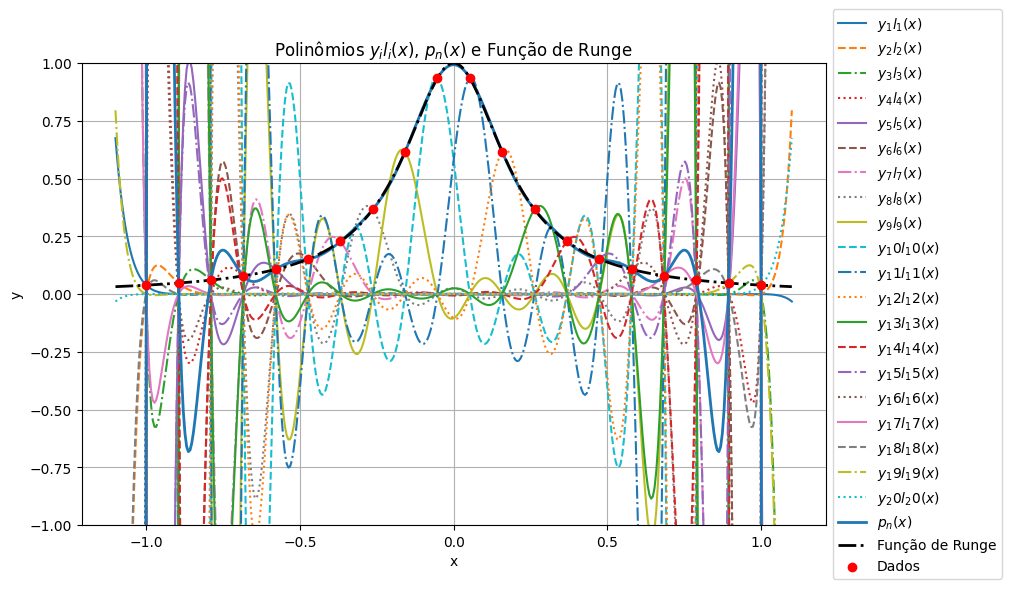

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Runge
def runge_function(x):
    return 1 / (1 + 25 * x ** 2)

# Definir os dados da tabela
n_points = 20
x_data = np.linspace(-1, 1, n_points)
y_data = runge_function(x_data)

# Definir a função para calcular cada l_i(x)
def l_i(x, i, x_data):
    l = 1
    for j in range(len(x_data)):
        if j != i:
            l *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return l

# Definir a função para calcular p_n(x)
def p_n(x, x_data, y_data):
    p = 0
    for i in range(len(y_data)):
        p += y_data[i] * l_i(x, i, x_data)
    return p

# Criar pontos x para a plotagem
x_points = np.linspace(min(x_data) - 0.1, max(x_data) + 0.1, 400)
y_runge = runge_function(x_points)

# Configuração de estilo de linha
line_styles = ['-', '--', '-.', ':']

# Plotar cada y_i * l_i(x)
plt.figure(figsize=(12, 6))

for i in range(len(x_data)):
    y_points = [y_data[i] * l_i(x, i, x_data) for x in x_points]
    plt.plot(x_points, y_points, label=f"$y_{i+1}l_{i+1}(x)$", linestyle=line_styles[i % len(line_styles)])

# Plotar p_n(x)
y_points = [p_n(x, x_data, y_data) for x in x_points]
plt.plot(x_points, y_points, label=f"$p_n(x)$", linestyle=line_styles[(len(x_data)) % len(line_styles)], linewidth=2)

# Plotar função de Runge
plt.plot(x_points, y_runge, label="Função de Runge", linestyle='-.', linewidth=2, color='black')

# Adicionar pontos de dados em vermelho
plt.scatter(x_data, y_data, color='red', zorder=5, label='Dados')

# Configurações de plotagem
plt.title("Polinômios $y_il_i(x)$, $p_n(x)$ e Função de Runge")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1,1)
plt.legend()
plt.grid(True)

# Obtém a posição atual da área de plotagem
box = plt.gca().get_position()

# Reduz a largura da área de plotagem em 20% para criar espaço para a legenda
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Move a legenda para fora da área de plotagem, alinhando-a ao centro verticalmente
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


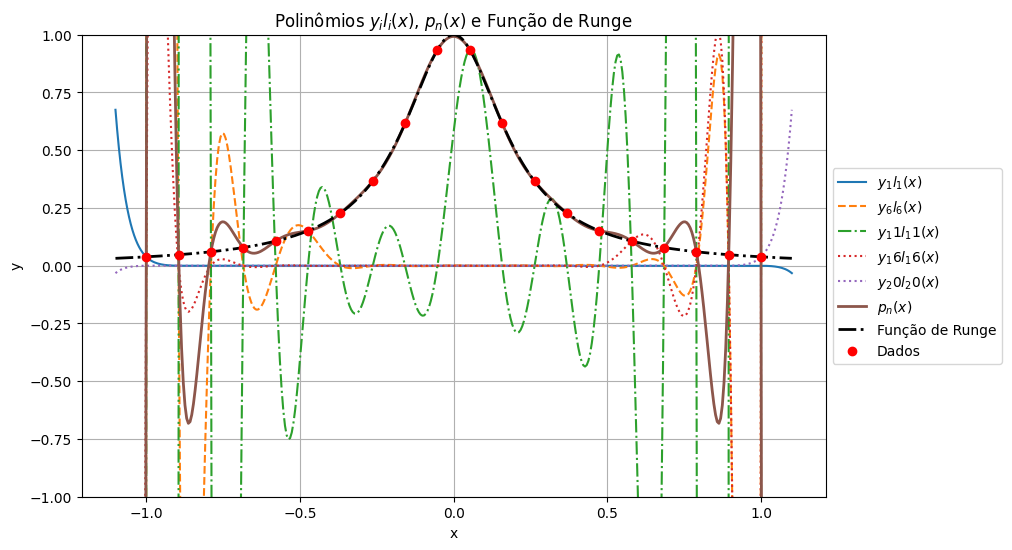

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Runge
def runge_function(x):
    return 1 / (1 + 25 * x ** 2)

# Definir os dados da tabela
n_points = 20  # Aumentando para 20 para observar o fenômeno de Runge mais claramente
x_data = np.linspace(-1, 1, n_points)
y_data = runge_function(x_data)

# Definir a função para calcular cada l_i(x)
def l_i(x, i, x_data):
    l = 1
    for j in range(len(x_data)):
        if j != i:
            l *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return l

# Definir a função para calcular p_n(x)
def p_n(x, x_data, y_data):
    p = 0
    for i in range(len(y_data)):
        p += y_data[i] * l_i(x, i, x_data)
    return p

# Criar pontos x para a plotagem
x_points = np.linspace(min(x_data) - 0.1, max(x_data) + 0.1, 400)
y_runge = runge_function(x_points)

# Configuração de estilo de linha
line_styles = ['-', '--', '-.', ':']

# Índices específicos para plotar
indices_to_plot = [0, 5, 10, 15, 19]  # Você pode modificar esta lista conforme necessário

# Plotar cada y_i * l_i(x) para os índices selecionados
plt.figure(figsize=(12, 6))
for i in indices_to_plot:
    y_points = [y_data[i] * l_i(x, i, x_data) for x in x_points]
    plt.plot(x_points, y_points, label=f"$y_{i+1}l_{i+1}(x)$", linestyle=line_styles[i % len(line_styles)])

# Plotar p_n(x)
y_points = [p_n(x, x_data, y_data) for x in x_points]
plt.plot(x_points, y_points, label=f"$p_n(x)$", linestyle=line_styles[(len(x_data)) % len(line_styles)], linewidth=2)

# Plotar função de Runge
plt.plot(x_points, y_runge, label="Função de Runge", linestyle='-.', linewidth=2, color='black')

# Adicionar pontos de dados em vermelho
plt.scatter(x_data, y_data, color='red', zorder=5, label='Dados')

# Configurações de plotagem
plt.title("Polinômios $y_il_i(x)$, $p_n(x)$ e Função de Runge")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1, 1)
plt.grid(True)

# Obtém a posição atual da área de plotagem
box = plt.gca().get_position()

# Reduz a largura da área de plotagem em 20% para criar espaço para a legenda
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Move a legenda para fora da área de plotagem, alinhando-a ao centro verticalmente
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Segmentada

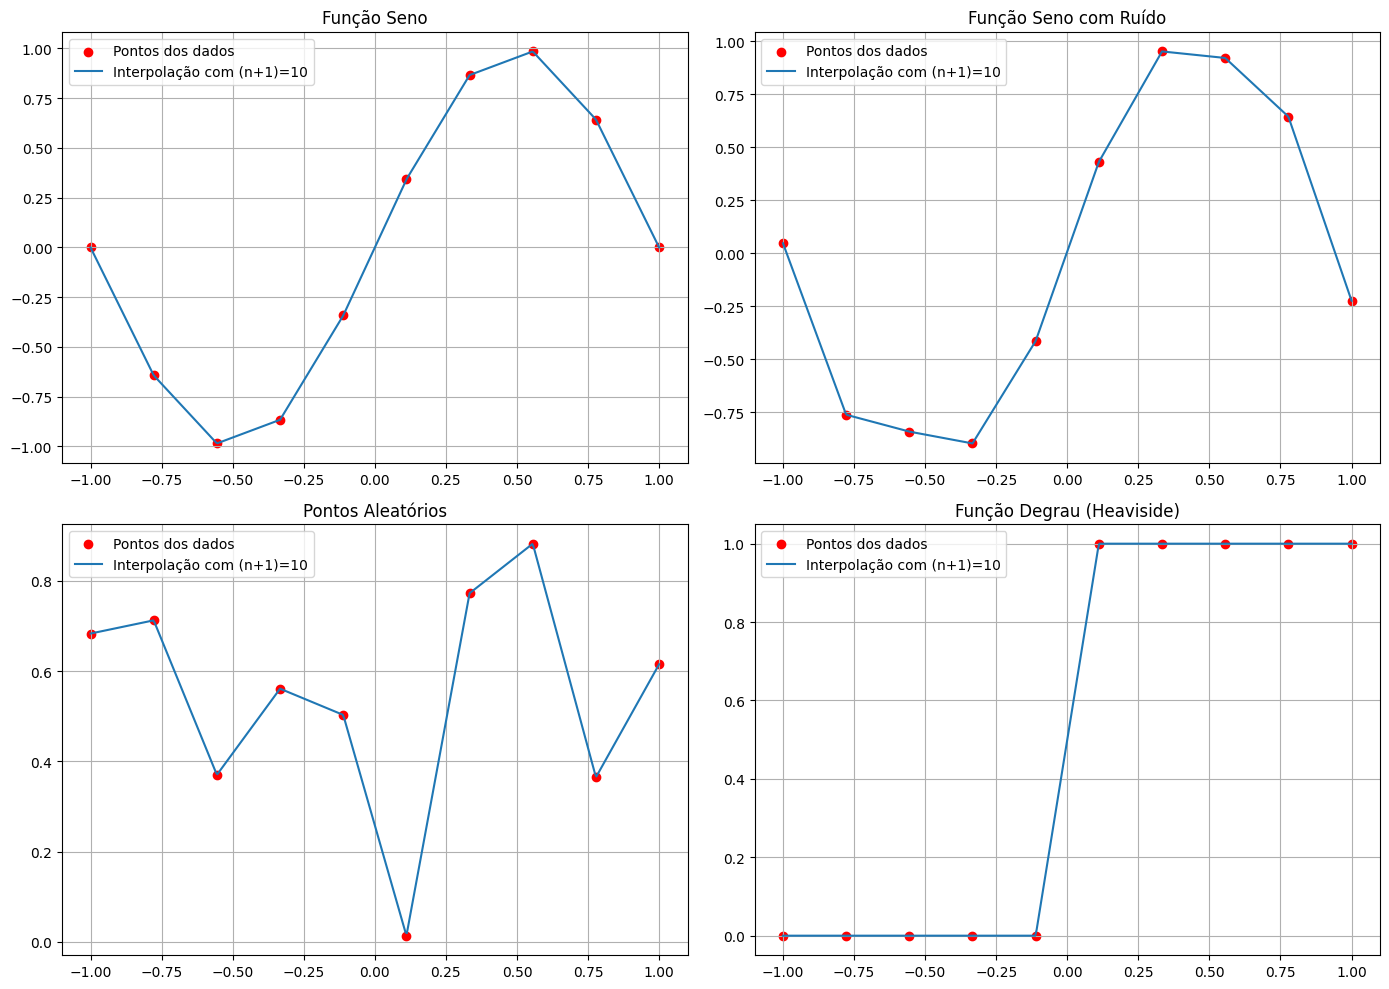

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

def piecewise_linear_interpolation(x, y, x_fino):
    y_fino = np.zeros_like(x_fino)
    for i in range(len(x) - 1):
        x_i, x_next = x[i], x[i+1]
        y_i, y_next = y[i], y[i+1]

        # Get the indices of x_fino where the condition is satisfied
        indices = np.where((x_fino >= x_i) & (x_fino <= x_next))

        # Calculate interpolated values using the formula
        y_fino[indices] = y_i + (y_next - y_i) / (x_next - x_i) * (x_fino[indices] - x_i)

    return y_fino

# In the plotting function, replace the Lagrange interpolation with the new function
def plotar_com_interpolacao_segmentada(x, y, n, ax):
    ax.scatter(x, y, label='Pontos dos dados', color='red')

    x_fino = np.linspace(min(x), max(x), 400)
    y_fino = piecewise_linear_interpolation(x, y, x_fino)

    # If you still want to force exactness at the data points, uncomment below.
    # for xi, yi in zip(x, y):
    #    y_fino[x_fino == xi] = yi

    ax.plot(x_fino, y_fino, label=f'Interpolação com (n+1)={len(x)}', linestyle='-')

    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
x_vals = np.linspace(-1, 1, 10)
n = len(x_vals)

# 1. Função Seno
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao_segmentada(x_vals, y1, n, axs[0, 0])
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao_segmentada(x_vals, y2, n, axs[0, 1])
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao_segmentada(x_vals, y3, n, axs[1, 0])
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao_segmentada(x_vals, y4, n, axs[1, 1])
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()


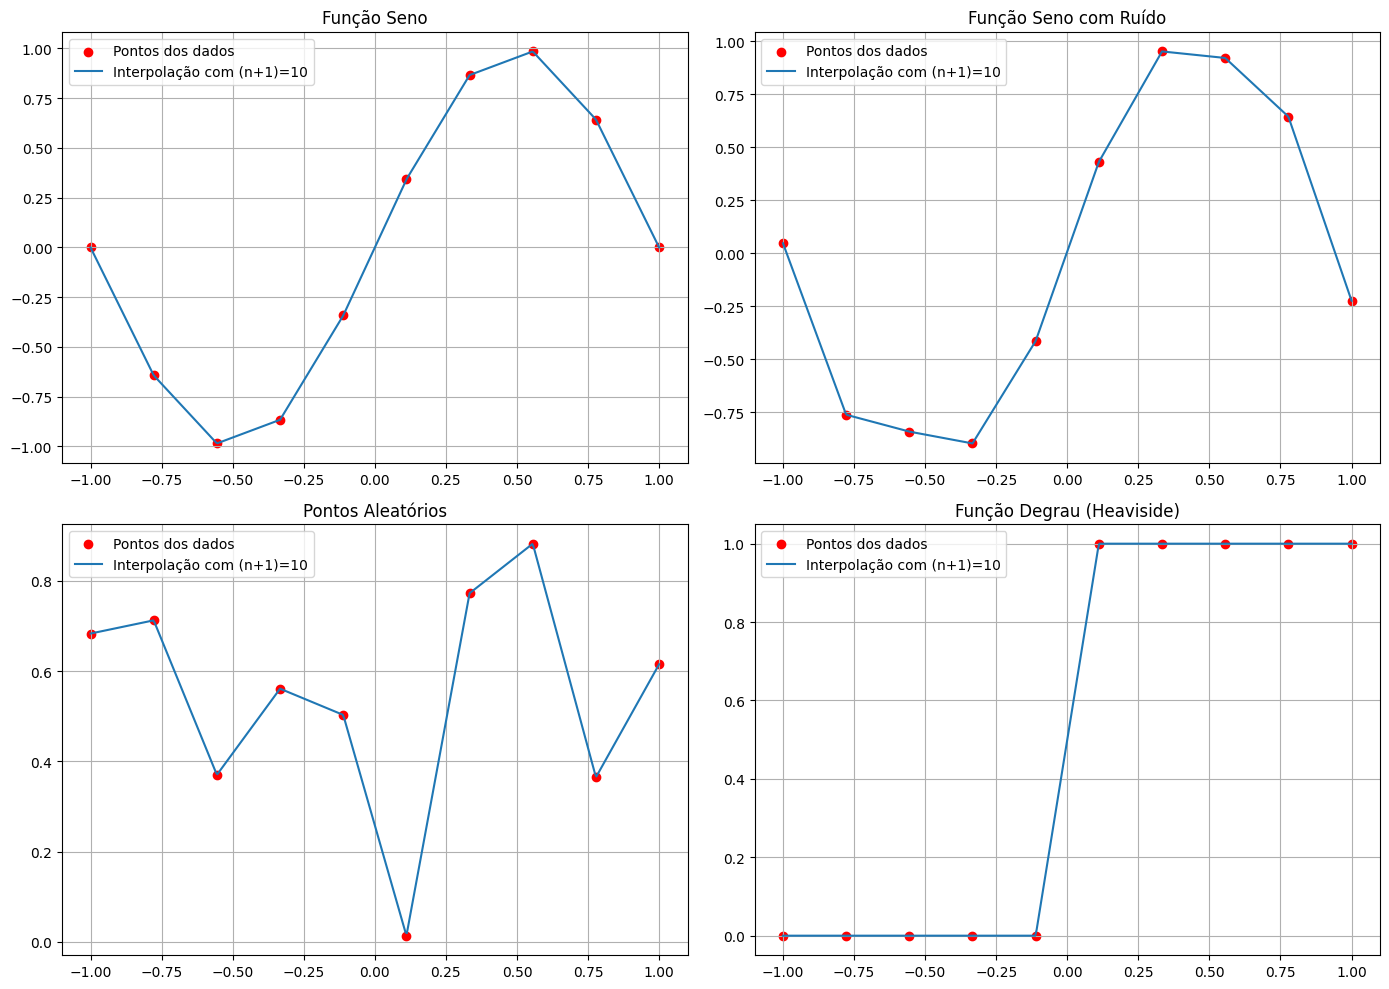

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

def Gi(x, x_prev, x_i, x_next):
    if x <= x_prev:
        return 0
    elif x_prev <= x <= x_i:
        return (x - x_prev) / (x_i - x_prev)
    elif x_i <= x <= x_next:
        return (x_next - x) / (x_next - x_i)
    else:
        return 0

def generalized_piecewise_linear(x, y, x_fino):
    y_fino = np.zeros_like(x_fino)
    n = len(x)
    for i in range(n):
        x_prev = x[i-1] if i > 0 else x[i] - 1  # Assuming equally spaced, otherwise, choose wisely.
        x_i = x[i]
        x_next = x[i+1] if i < n - 1 else x[i] + 1  # Assuming equally spaced, otherwise, choose wisely.

        for j, x_val in enumerate(x_fino):
            y_fino[j] += y[i] * Gi(x_val, x_prev, x_i, x_next)

    return y_fino

# Plotting function
def plotar_com_interpolacao_generalizada(x, y, n, ax):
    ax.scatter(x, y, label='Pontos dos dados', color='red')

    x_fino = np.linspace(min(x), max(x), 400)
    y_fino = generalized_piecewise_linear(x, y, x_fino)

    ax.plot(x_fino, y_fino, label=f'Interpolação com (n+1)={len(x)}', linestyle='-')

    ax.legend()
    ax.grid(True)

# Rest of your code to produce the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
x_vals = np.linspace(-1, 1, 10)
n = len(x_vals)

# Functions
y1 = np.sin(np.pi * x_vals)
plotar_com_interpolacao_generalizada(x_vals, y1, n, axs[0, 0])
axs[0, 0].set_title('Função Seno')

y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao_generalizada(x_vals, y2, n, axs[0, 1])
axs[0, 1].set_title('Função Seno com Ruído')

y3 = np.random.rand(n)
plotar_com_interpolacao_generalizada(x_vals, y3, n, axs[1, 0])
axs[1, 0].set_title('Pontos Aleatórios')

y4 = np.heaviside(x_vals, 0)
plotar_com_interpolacao_generalizada(x_vals, y4, n, axs[1, 1])
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()


# Chebyshev

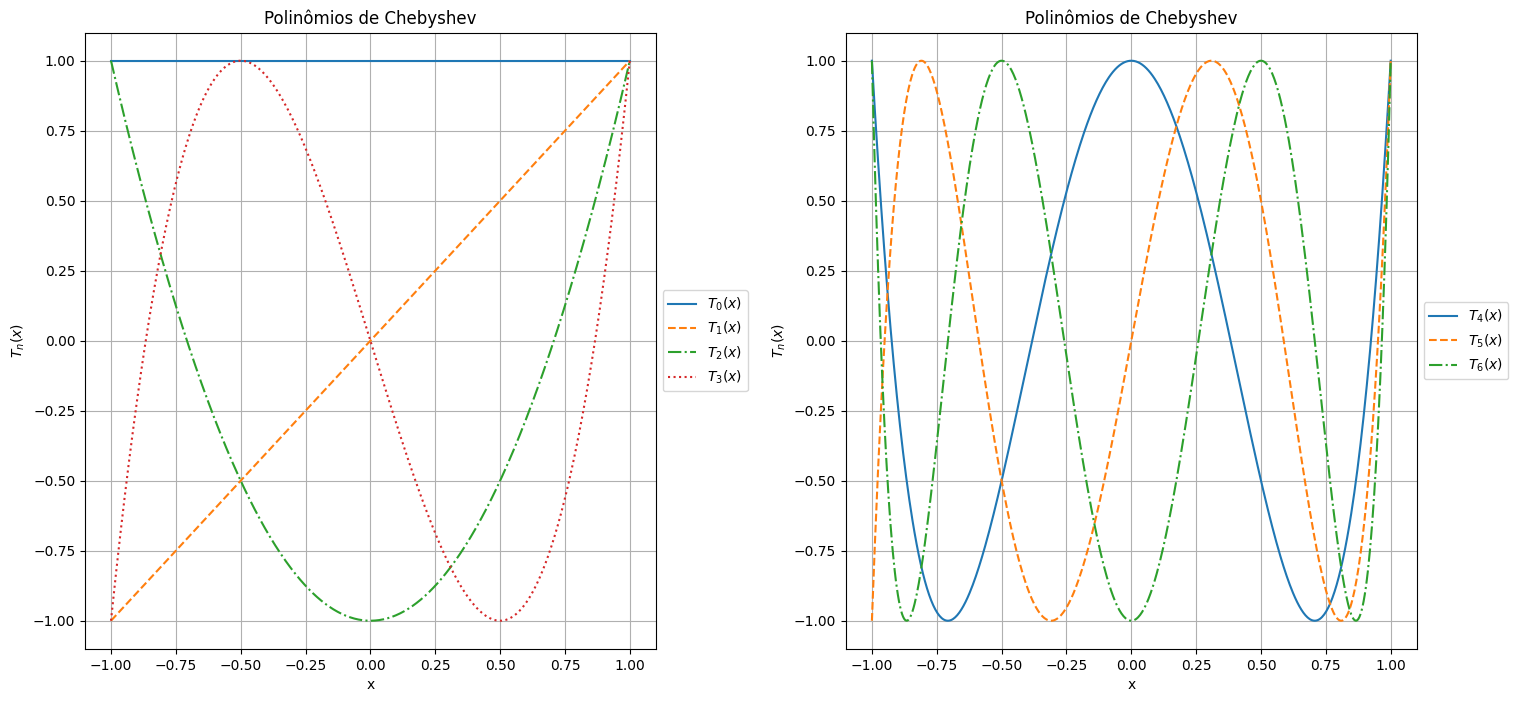

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def chebyshev_polynomial(n, x):
    """Calcula o polinômio de Chebyshev de ordem n para um dado x."""
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(n - 1, x) - chebyshev_polynomial(n - 2, x)

# Configuração de estilo de linha
line_styles = ['-', '--', '-.', ':']

# Gerar pontos x
x_values = np.linspace(-1, 1, 500)

# Preparar o plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotar polinômios de Chebyshev para graus de 0 a 3
for n in range(4):
    y_values = [chebyshev_polynomial(n, x) for x in x_values]
    axes[0].plot(x_values, y_values, label=f'$T_{n}(x)$', linestyle=line_styles[n % 4])

# Plotar polinômios de Chebyshev para graus de 4 a 6
for n in range(4, 7):
    y_values = [chebyshev_polynomial(n, x) for x in x_values]
    axes[1].plot(x_values, y_values, label=f'$T_{n}(x)$', linestyle=line_styles[n % 4])

# Configurações do gráfico
for ax in axes:
    ax.set_title('Polinômios de Chebyshev')
    ax.set_xlabel('x')
    ax.set_ylabel('$T_n(x)$')
    ax.grid(True)
    # Configuração para mover a legenda para fora da área de plotagem
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



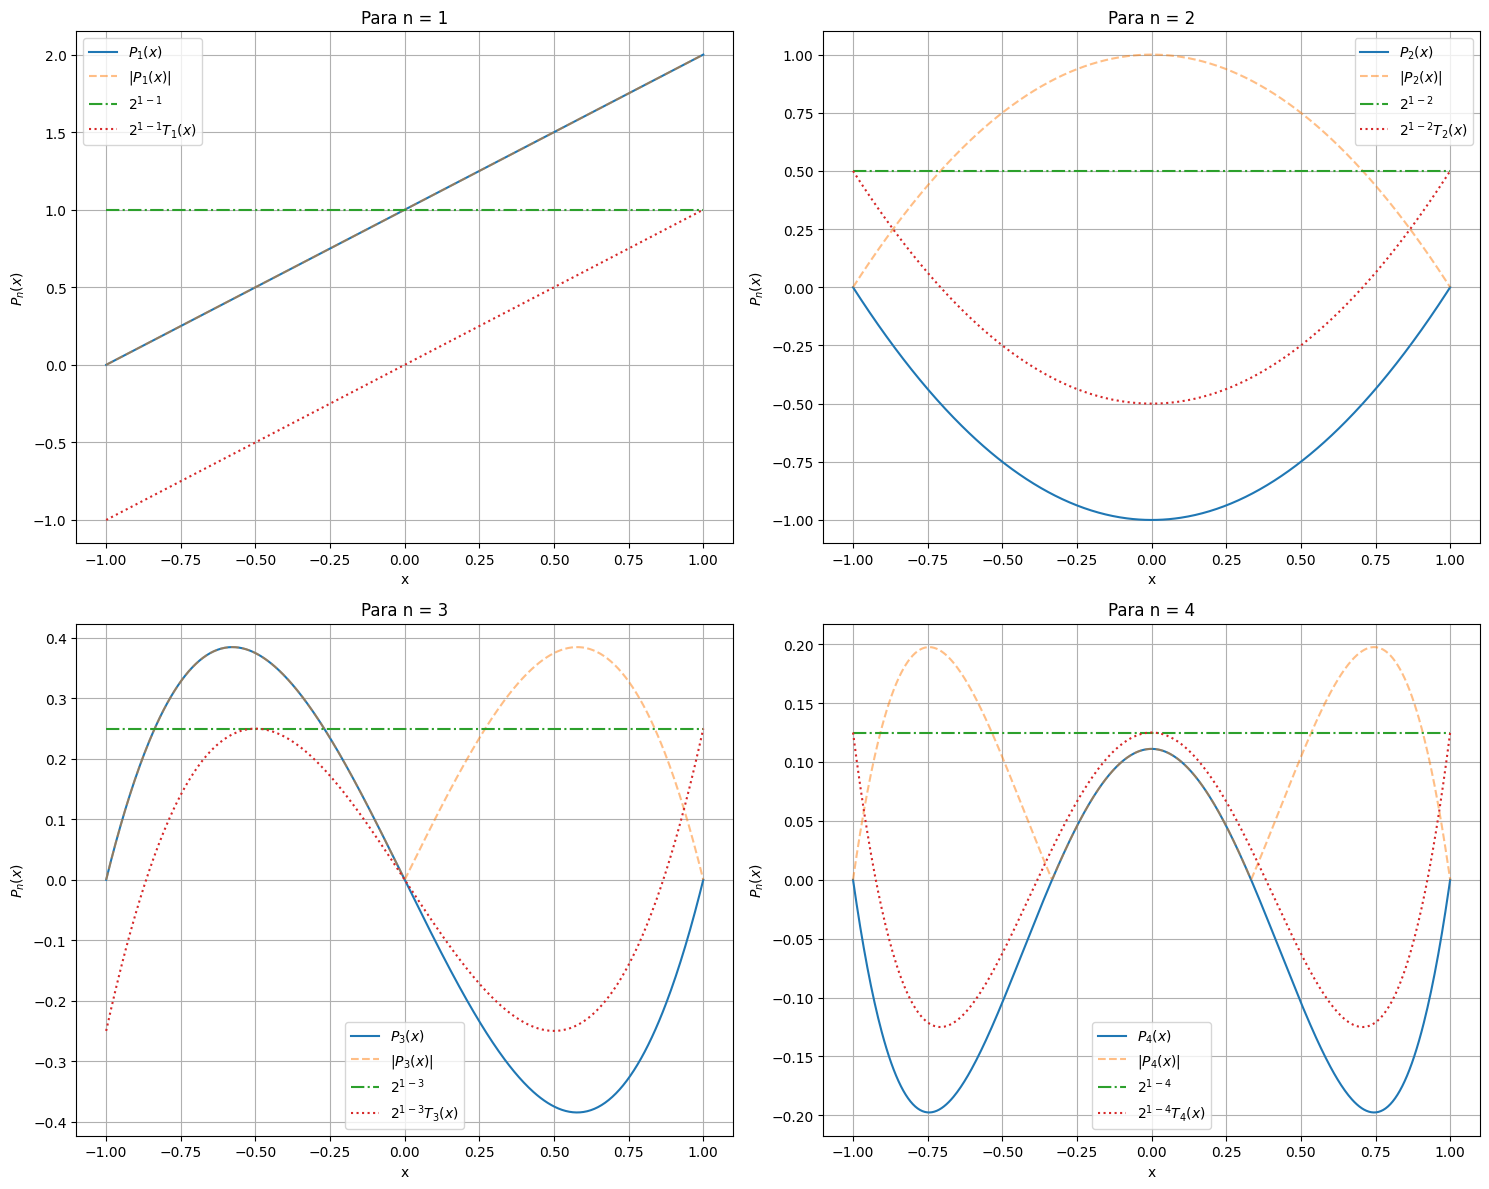

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.chebyshev as cheb

def lagrange_polynomial(n, x):
    """Calculate the Lagrange polynomial based on uniformly spaced interpolation points."""
    x_points = np.linspace(-1, 1, n)
    result = 1.0
    for x_i in x_points:
        result *= (x - x_i)
    return result

# Prepare the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Levels of n for the polynomial
n_values = [1, 2, 3, 4]

# Line style configuration
line_styles = ['-', '--', '-.', ':']

# Generate x points
x_values = np.linspace(-1, 1, 500)

# Plot graphs
for i, ax in enumerate(axes.flat):
    n = n_values[i]

    # Calculate and plot the Lagrange polynomial
    y_values_poly = [lagrange_polynomial(n, x) for x in x_values]
    ax.plot(x_values, y_values_poly, label=f'$P_{n}(x)$', linestyle=line_styles[0]) # $P_{n}(x) = \prod_i^{n+1} (x-x_i)$

    # Calculate and plot absolute values of the polynomial
    ax.plot(x_values, np.abs(y_values_poly), label=f'|$P_{n}(x)$|', linestyle=line_styles[1], alpha=0.5)

    # Calculate and plot 2^{1-n}
    y_value_const = np.full_like(x_values, 2**(1-n))
    ax.plot(x_values, y_value_const, label=f'$2^{{1-{n}}}$', linestyle=line_styles[2])

    # Calculate and plot scaled Chebyshev polynomial 2^{1-n} * T_n(x)
    y_values_scaled_chebyshev = 2**(1-n) * cheb.chebval(x_values, [0]*n + [1])
    ax.plot(x_values, y_values_scaled_chebyshev, label=f'$2^{{1-{n}}}T_{n}(x)$', linestyle=line_styles[3])

    # Graph settings
    ax.set_title(f'Para n = {n}')
    ax.set_xlabel('x')
    ax.set_ylabel('$P_n(x)$')
    ax.grid(True)
    ax.legend()
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()


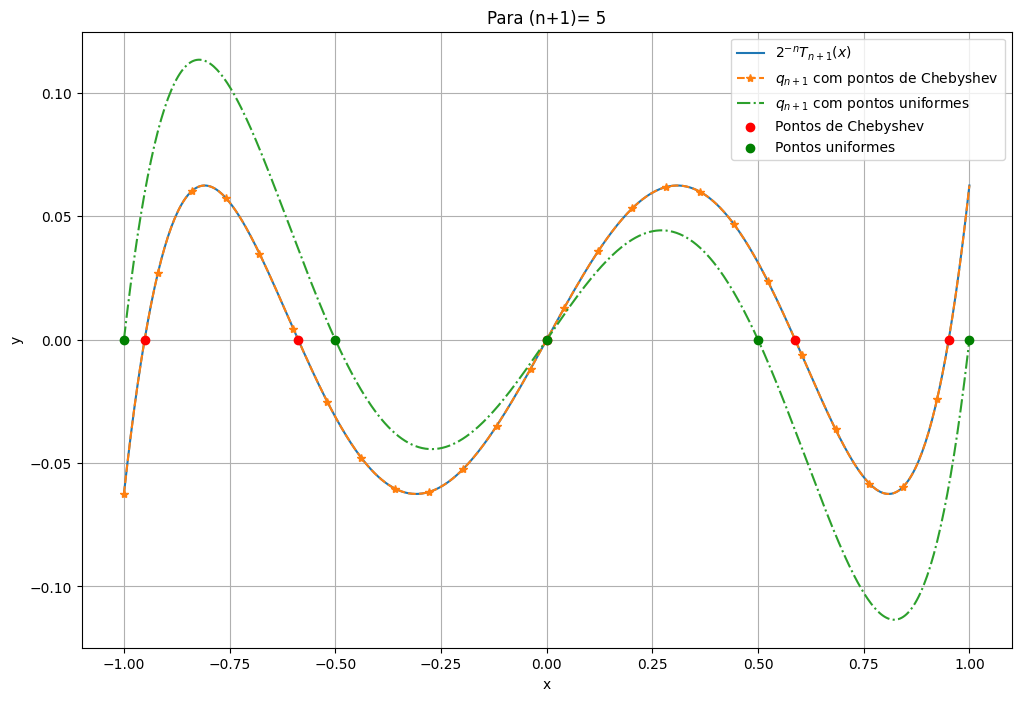

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.chebyshev as cheb

def chebyshev_zeros(n):
    """Calculate the zeros of the Chebyshev polynomial of degree n."""
    return np.cos(np.pi * (np.arange(1, n + 1) - 0.5) / n)

def q_polynomial(n, x, x_points):
    """Calculate the right-hand side of the equation using the given x_points."""
    result = 1.0
    for x_i in x_points:
        result *= (x - x_i)
    return result

# Prepare the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Degree of the polynomial
n = 4

# Generate x points
x_values = np.linspace(-1, 1, 500)

# Calculate and plot the Chebyshev polynomial 2^{1-(n+1)} * T_{n+1}(x)
y_values_chebyshev = 2**(1-(n+1)) * cheb.chebval(x_values, [0] * (n + 1) + [1])
ax.plot(x_values, y_values_chebyshev, label=f'$2^{{-n}}T_{{n+1}}(x)$')

# # Calculate and plot $q_{{n+1}}$ polynomial using Chebyshev zeros
# cheb_zeros = chebyshev_zeros(n+1)
# y_values_rhs_cheb = [q_polynomial(n, x, cheb_zeros) for x in x_values]
# ax.plot(x_values, y_values_rhs_cheb, label=f'$q_{{n+1}}$ com pontos de Chebyshev', linestyle='--')

# Calculate and plot $q_{{n+1}}$ polynomial using Chebyshev zeros
cheb_zeros = chebyshev_zeros(n+1)
y_values_rhs_cheb = [q_polynomial(n, x, cheb_zeros) for x in x_values]
ax.plot(x_values, y_values_rhs_cheb, label=f'$q_{{n+1}}$ com pontos de Chebyshev', linestyle='--', marker='*', markevery=20)

# Calculate and plot $q_{{n+1}}$ polynomial using uniformly spaced points
uniform_points = np.linspace(-1, 1, n+1)
y_values_rhs_uniform = [q_polynomial(n, x, uniform_points) for x in x_values]
ax.plot(x_values, y_values_rhs_uniform, label=f'$q_{{n+1}}$ com pontos uniformes', linestyle='-.')

# Mark Chebyshev zeros
ax.scatter(cheb_zeros, np.zeros_like(cheb_zeros), color='red', zorder=5, label="Pontos de Chebyshev")

# Mark uniformly spaced points
ax.scatter(uniform_points, np.zeros_like(uniform_points), color='green', zorder=5, label="Pontos uniformes")

# Graph settings
ax.set_title(f'Para (n+1)= {n+1}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend()

plt.show()


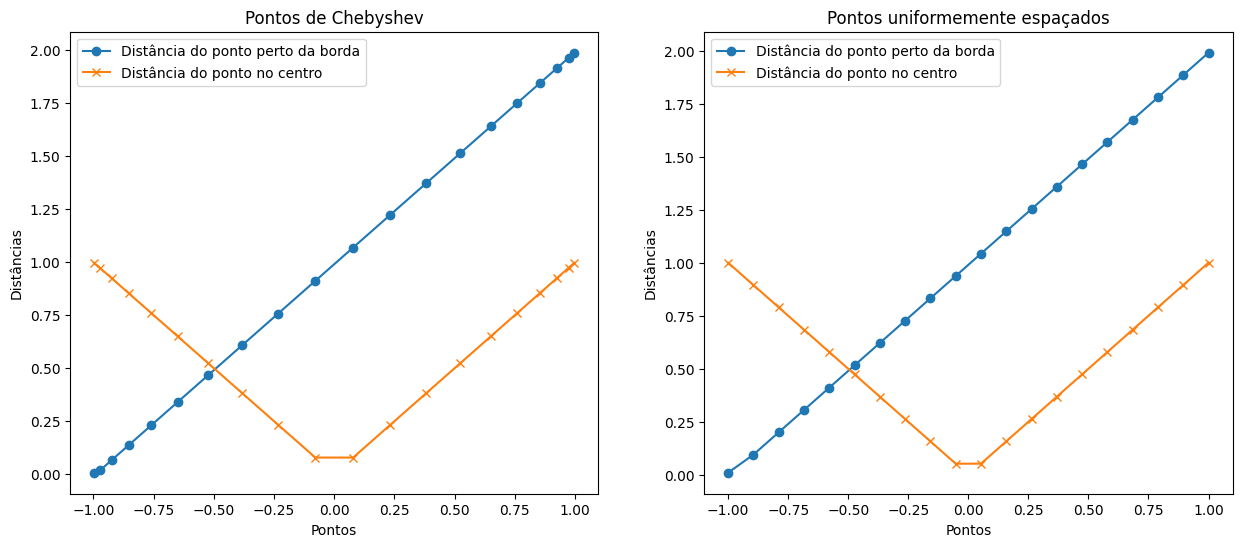

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o número de pontos e o intervalo [a, b]
n = 20
a, b = -1, 1

# Calcular os pontos de Chebyshev
x_chebyshev = [(a + b) / 2 + (b - a) / 2 * np.cos((2 * i - 1) * np.pi / (2 * n)) for i in range(1, n + 1)]

# Calcular pontos uniformemente espaçados
x_uniform = np.linspace(a, b, n)

# Definir pontos de referência: um perto da borda esquerda e um no centro
point_near_edge = a + 0.01
point_at_center = (a + b) / 2

# Calcular as distâncias dos pontos de referência até cada ponto
dist_to_chebyshev_from_edge = [abs(x - point_near_edge) for x in x_chebyshev]
dist_to_chebyshev_from_center = [abs(x - point_at_center) for x in x_chebyshev]

dist_to_uniform_from_edge = [abs(x - point_near_edge) for x in x_uniform]
dist_to_uniform_from_center = [abs(x - point_at_center) for x in x_uniform]

# Criar os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para pontos de Chebyshev
ax1.plot(x_chebyshev, dist_to_chebyshev_from_edge, label='Distância do ponto perto da borda', marker='o')
ax1.plot(x_chebyshev, dist_to_chebyshev_from_center, label='Distância do ponto no centro', marker='x')
ax1.set_title('Pontos de Chebyshev')
ax1.set_xlabel('Pontos')
ax1.set_ylabel('Distâncias')
ax1.legend()

# Gráfico para pontos uniformemente espaçados
ax2.plot(x_uniform, dist_to_uniform_from_edge, label='Distância do ponto perto da borda', marker='o')
ax2.plot(x_uniform, dist_to_uniform_from_center, label='Distância do ponto no centro', marker='x')
ax2.set_title('Pontos uniformemente espaçados')
ax2.set_xlabel('Pontos')
ax2.set_ylabel('Distâncias')
ax2.legend()

plt.show()


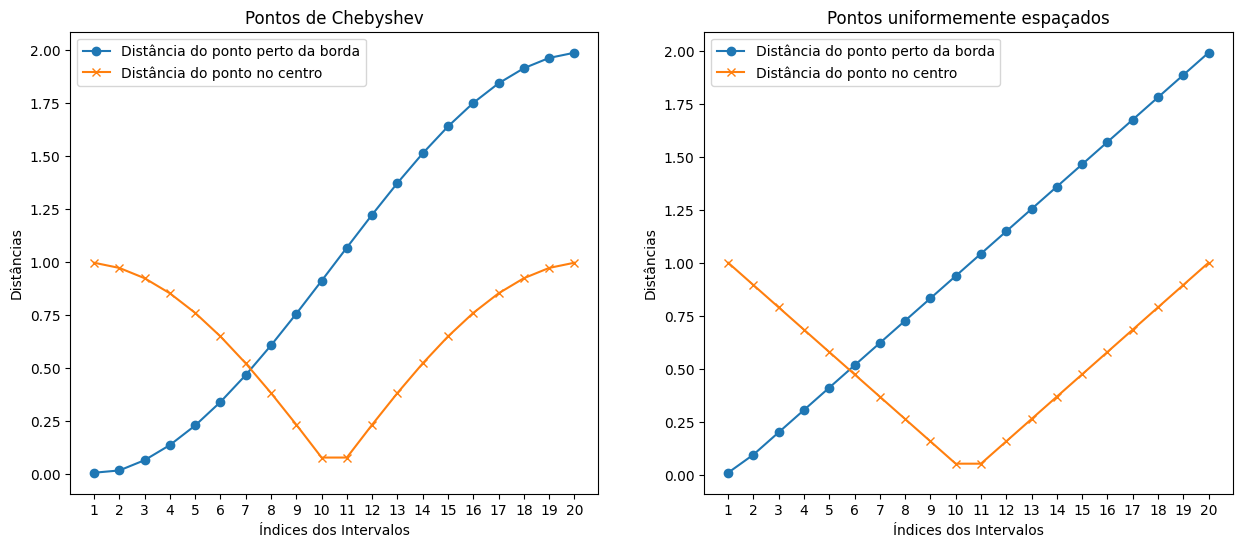

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o número de pontos e o intervalo [a, b]
n = 20
a, b = -1, 1

# Calcular os pontos de Chebyshev e invertê-los
x_chebyshev = [(a + b) / 2 + (b - a) / 2 * np.cos((2 * i - 1) * np.pi / (2 * n)) for i in range(1, n + 1)]
x_chebyshev_reversed = x_chebyshev[::-1]

# Calcular pontos uniformemente espaçados
x_uniform = np.linspace(a, b, n)

# Definir pontos de referência: um perto da borda esquerda e um no centro
point_near_edge = a + 0.01
point_at_center = (a + b) / 2

# Calcular as distâncias dos pontos de referência até cada ponto
dist_to_chebyshev_from_edge_reversed = [abs(x - point_near_edge) for x in x_chebyshev_reversed]
dist_to_chebyshev_from_center_reversed = [abs(x - point_at_center) for x in x_chebyshev_reversed]

dist_to_uniform_from_edge = [abs(x - point_near_edge) for x in x_uniform]
dist_to_uniform_from_center = [abs(x - point_at_center) for x in x_uniform]

# Criar os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para pontos de Chebyshev invertidos
indices = list(range(1, n + 1))  # Índices começando de 1 até n
ax1.plot(indices, dist_to_chebyshev_from_edge_reversed, label='Distância do ponto perto da borda', marker='o')
ax1.plot(indices, dist_to_chebyshev_from_center_reversed, label='Distância do ponto no centro', marker='x')
ax1.set_title('Pontos de Chebyshev') #  (Invertidos)
ax1.set_xlabel('Índices dos Intervalos')
ax1.set_xticks(indices)
ax1.set_ylabel('Distâncias')
ax1.legend()

# Gráfico para pontos uniformemente espaçados
ax2.plot(indices, dist_to_uniform_from_edge, label='Distância do ponto perto da borda', marker='o')
ax2.plot(indices, dist_to_uniform_from_center, label='Distância do ponto no centro', marker='x')
ax2.set_title('Pontos uniformemente espaçados')
ax2.set_xlabel('Índices dos Intervalos')
ax2.set_xticks(indices)
ax2.set_ylabel('Distâncias')
ax2.legend()

plt.show()


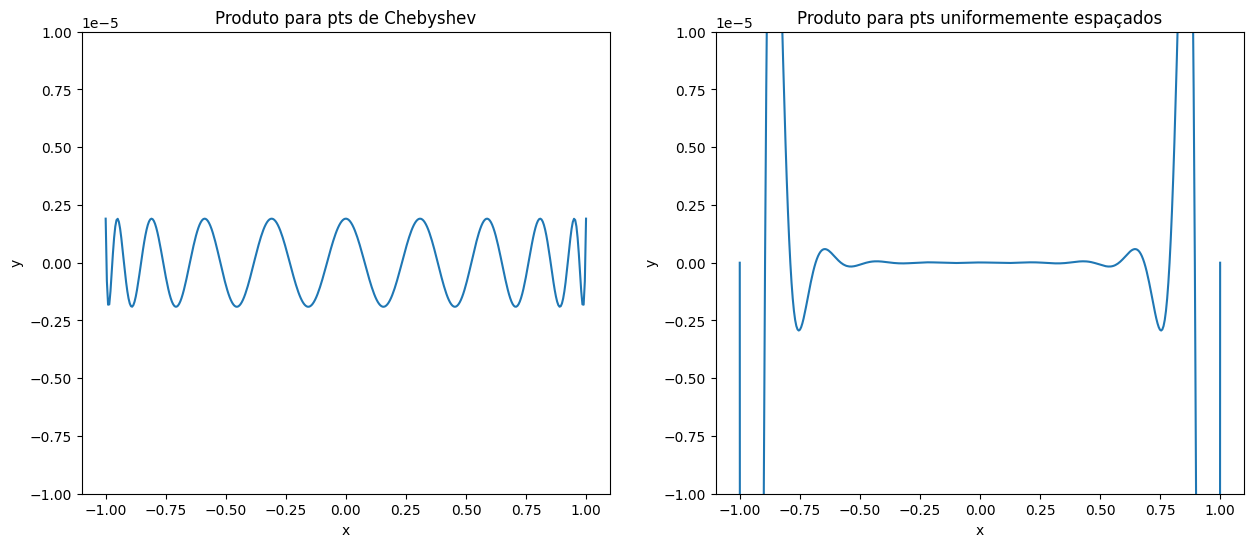

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o produto (x-x1)(x-x2)...(x-xn)
def poly_product(x, points):
    result = 1
    for point in points:
        result *= (x - point)
    return result

# Definir o número de pontos e o intervalo [a, b]
n = 20
a, b = -1, 1

# Calcular os pontos de Chebyshev e uniformemente espaçados
x_chebyshev = [(a + b) / 2 + (b - a) / 2 * np.cos((2 * i - 1) * np.pi / (2 * n)) for i in range(1, n + 1)]
x_uniform = np.linspace(a, b, n)

# Gerar pontos de x para a plotagem
x_values = np.linspace(a, b, 400)

# Calcular o produto polinomial para os pontos de x
y_chebyshev = [poly_product(x, x_chebyshev) for x in x_values]
y_uniform = [poly_product(x, x_uniform) for x in x_values]

# Criar os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para pontos de Chebyshev
ax1.plot(x_values, y_chebyshev)
ax1.set_title('Produto para pts de Chebyshev')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_ylim(-0.00001, 0.00001)

# Gráfico para pontos uniformemente espaçados
ax2.plot(x_values, y_uniform)
ax2.set_title('Produto para pts uniformemente espaçados')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_ylim(-0.00001, 0.00001)

plt.show()


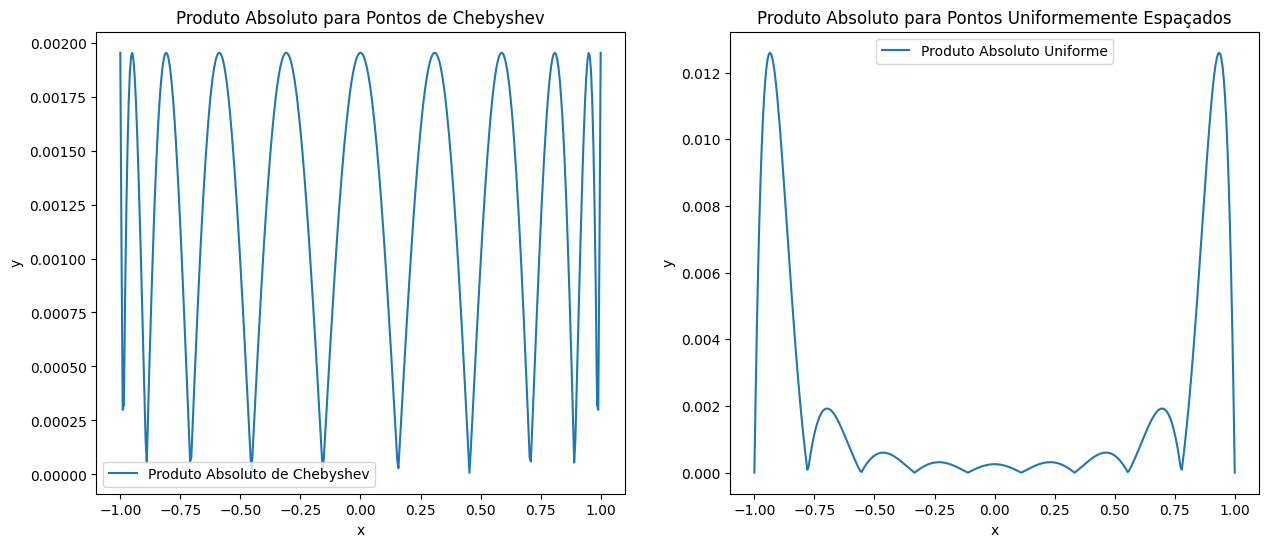

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o produto dos valores absolutos |x-x1||x-x2|...|x-xn|
def poly_product_abs(x, points):
    result = 1
    for point in points:
        result *= abs(x - point)
    return result

# Definir o número de pontos e o intervalo [a, b]
n = 10
a, b = -1, 1

# Calcular os pontos de Chebyshev e uniformemente espaçados
x_chebyshev = [(a + b) / 2 + (b - a) / 2 * np.cos((2 * i - 1) * np.pi / (2 * n)) for i in range(1, n + 1)]
x_uniform = np.linspace(a, b, n)

# Gerar pontos de x para a plotagem
x_values = np.linspace(a, b, 400)

# Calcular o produto polinomial para os pontos de x
y_chebyshev = [poly_product_abs(x, x_chebyshev) for x in x_values]
y_uniform = [poly_product_abs(x, x_uniform) for x in x_values]

# Criar os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para pontos de Chebyshev
ax1.plot(x_values, y_chebyshev, label='Produto Absoluto de Chebyshev')
ax1.set_title('Produto Absoluto para Pontos de Chebyshev')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

# Gráfico para pontos uniformemente espaçados
ax2.plot(x_values, y_uniform, label='Produto Absoluto Uniforme')
ax2.set_title('Produto Absoluto para Pontos Uniformemente Espaçados')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.show()


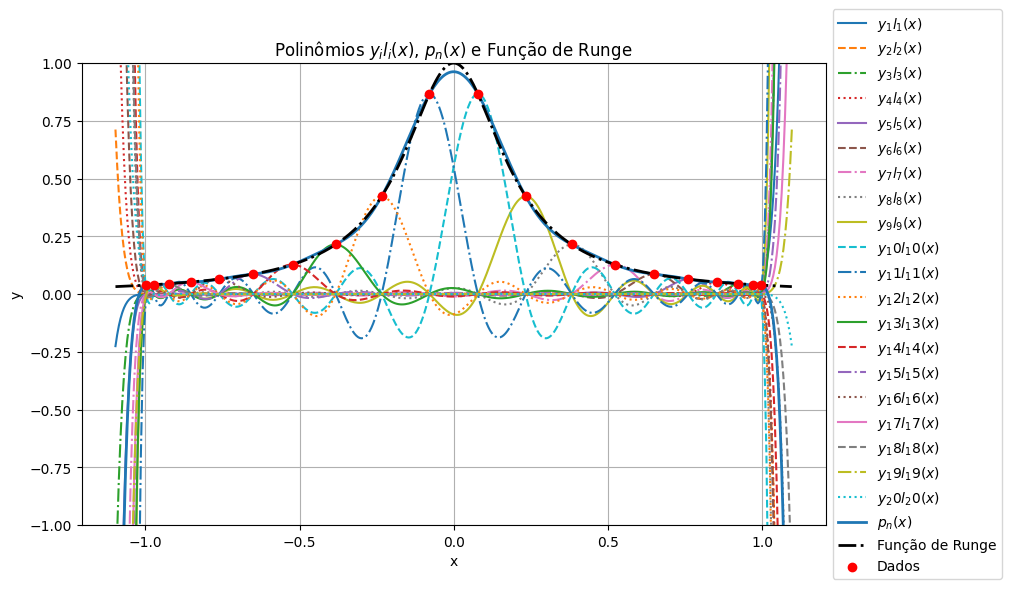

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Runge
def runge_function(x):
    return 1 / (1 + 25 * x ** 2)

# Gerar pontos de Chebyshev
def chebyshev_points(a, b, n):
    return [(a + b) / 2 + (b - a) / 2 * np.cos(np.pi * (2 * i - 1) / (2 * n)) for i in range(1, n + 1)]

# def chebyshev_points(a, b, n):
#     return [(a + b) / 2 + (b - a) / 2 * np.cos(np.pi * (2 * i - 1) / (2 * (n + 1))) for i in range(1, n + 1)]

# Definir os dados da tabela
n_points = 20
x_data = np.array(chebyshev_points(-1, 1, n_points))
y_data = runge_function(x_data)

# Definir a função para calcular cada l_i(x)
def l_i(x, i, x_data):
    l = 1
    for j in range(len(x_data)):
        if j != i:
            l *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return l

# Definir a função para calcular p_n(x)
def p_n(x, x_data, y_data):
    p = 0
    for i in range(len(y_data)):
        p += y_data[i] * l_i(x, i, x_data)
    return p

# Criar pontos x para a plotagem
x_points = np.linspace(min(x_data) - 0.1, max(x_data) + 0.1, 400)
y_runge = runge_function(x_points)

# Configuração de estilo de linha
line_styles = ['-', '--', '-.', ':']

# Plotar cada y_i * l_i(x)
plt.figure(figsize=(12, 6))

for i in range(len(x_data)):
    y_points = [y_data[i] * l_i(x, i, x_data) for x in x_points]
    plt.plot(x_points, y_points, label=f"$y_{i+1}l_{i+1}(x)$", linestyle=line_styles[i % len(line_styles)])

# Plotar p_n(x)
y_points = [p_n(x, x_data, y_data) for x in x_points]
plt.plot(x_points, y_points, label=f"$p_n(x)$", linestyle=line_styles[(len(x_data)) % len(line_styles)], linewidth=2)

# Plotar função de Runge
plt.plot(x_points, y_runge, label="Função de Runge", linestyle='-.', linewidth=2, color='black')

# Adicionar pontos de dados em vermelho
plt.scatter(x_data, y_data, color='red', zorder=5, label='Dados')

# Configurações de plotagem
plt.title("Polinômios $y_il_i(x)$, $p_n(x)$ e Função de Runge")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1,1)
plt.legend()
plt.grid(True)

# Obtém a posição atual da área de plotagem
box = plt.gca().get_position()

# Reduz a largura da área de plotagem em 20% para criar espaço para a legenda
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Move a legenda para fora da área de plotagem, alinhando-a ao centro verticalmente
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<ipython-input-8-bd8261d0e495>:18: RuntimeWarning: invalid value encountered in divide
  termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)


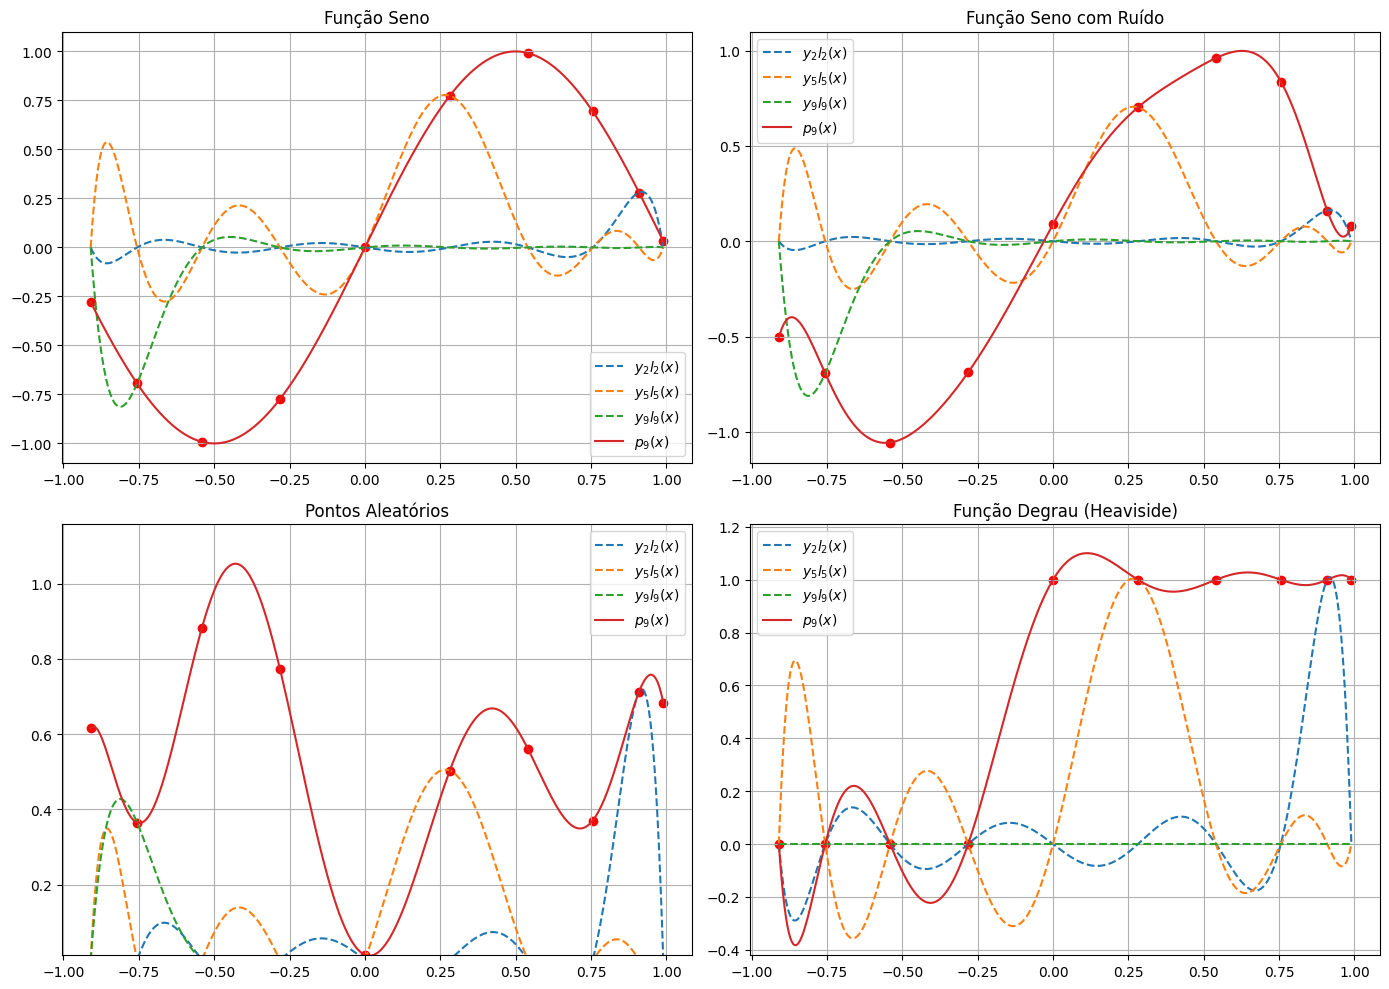

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

def calcular_wi(x, xi):
    termos = [(xi - xj) for xj in x if xj != xi]
    return 1 / np.prod(termos)

def lagrange_interpolacao(x, y, x_fino):
    l_x = np.prod([(x_fino - xi) for xi in x], axis=0)
    somatorio = 0
    termos_separados = []

    for i in range(len(x)):
        wi = calcular_wi(x, x[i])
        denominador = (x_fino - x[i])
        termo = np.where(denominador != 0, wi * y[i] * l_x / denominador, 0)
        termos_separados.append(termo)
        somatorio += termo

    return somatorio, termos_separados

def plotar_com_interpolacao_new(x, y, ax, indices_a_mostrar=None):
    ax.scatter(x, y, color='red')

    x_fino = np.linspace(min(x), max(x), 400)
    y_fino, termos_separados = lagrange_interpolacao(x, y, x_fino)

    # add
    for xi, yi in zip(x, y):
        y_fino[x_fino == xi] = yi

    for i, termo in enumerate(termos_separados):
        if indices_a_mostrar is None or i+1 in indices_a_mostrar:
            ax.plot(x_fino, termo, label=f"$y_{i+1}l_{i+1}(x)$", linestyle='--')
            # ax.plot(x_fino, termo, label=f"$y_{{i+1}}l_{{i+1}}(x)$", linestyle='--')

    ax.plot(x_fino, y_fino, label=f"$p_{{9}}(x)$", linestyle='-')

    # Configura o limite do eixo y baseado no mínimo e máximo de y_fino
    ax.set_ylim(1.1*min(y_fino), 1.1*max(y_fino))

    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# x_vals = np.linspace(-1, 1, 10)  # Mantido em 10 pontos
# n = len(x_vals)

# Usando pontos de Chebyshev
n = 10
i_vals = np.arange(1, n + 1)
x_chebyshev = np.cos((2 * i_vals - 1) * np.pi / (2 * (n + 1)))

indices_a_mostrar = [2, 5, 9]  # Índices dos termos y_i * l_i(x) para serem mostrados

# 1. Função Seno
y1 = np.sin(np.pi * x_chebyshev )
plotar_com_interpolacao_new(x_chebyshev , y1, axs[0, 0], indices_a_mostrar)
axs[0, 0].set_title('Função Seno')

# 2. Função Seno com Ruído
y2 = y1 + 0.1 * np.random.normal(size=n)
plotar_com_interpolacao_new(x_chebyshev , y2, axs[0, 1], indices_a_mostrar)
axs[0, 1].set_title('Função Seno com Ruído')

# 3. Pontos Aleatórios
y3 = np.random.rand(n)
plotar_com_interpolacao_new(x_chebyshev , y3, axs[1, 0], indices_a_mostrar)
axs[1, 0].set_title('Pontos Aleatórios')

# 4. Função Degrau (Heaviside)
y4 = np.heaviside(x_chebyshev , 0)
plotar_com_interpolacao_new(x_chebyshev , y4, axs[1, 1], indices_a_mostrar)
axs[1, 1].set_title('Função Degrau (Heaviside)')

plt.tight_layout()
plt.show()

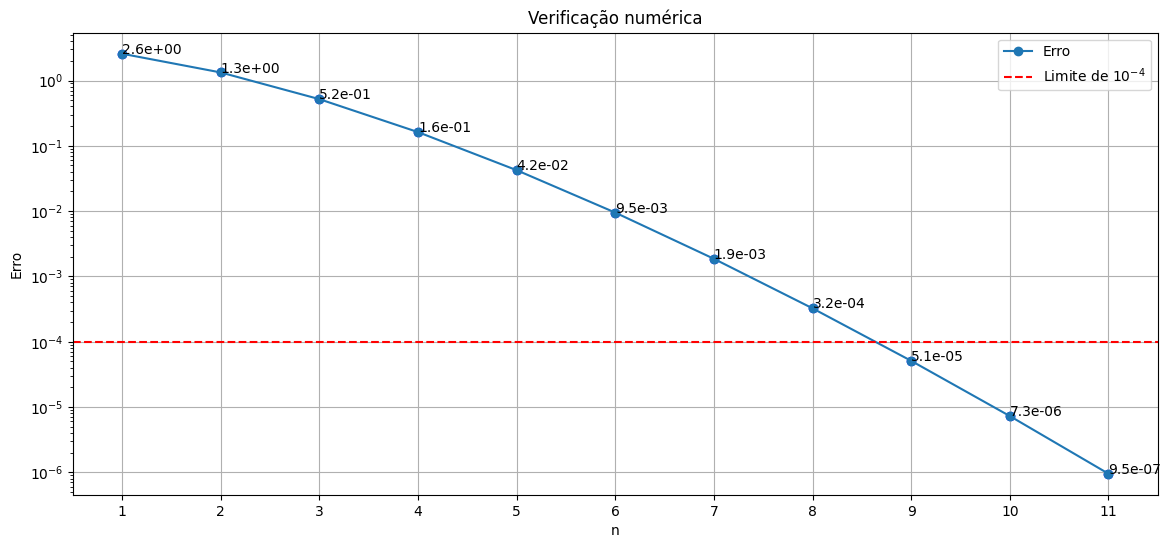

A condição é satisfeita para n = 9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função que representa o lado esquerdo da inequação
def lhs(n, a=0, b=1):
    R = (b - a) * np.exp(1) / (4 * (n + 1))
    return np.sqrt(2 / ((n + 1) * np.pi)) * (2 * np.pi * R) ** (n + 1)

# Inicializando a lista de valores
n_values = np.arange(1, 12)
lhs_values = [lhs(n) for n in n_values]

# Preparando o gráfico
plt.figure(figsize=(14, 6))
plt.semilogy(n_values, lhs_values, 'o-', label='Erro')
plt.scatter(n_values, lhs_values, c='b')
plt.axhline(y=1e-4, color='r', linestyle='--', label='Limite de $10^{-4}$')

# Adicionando anotações
for i, txt in enumerate(lhs_values):
    plt.annotate(f"{txt:.1e}", (n_values[i], lhs_values[i]))

# Configurações do gráfico
plt.xlabel('n')
plt.ylabel('Erro')
plt.title('Verificação numérica')
plt.grid(True)
plt.xticks(n_values)
plt.legend()

# Mostrando o gráfico
plt.show()

# Encontrando o valor de n onde a condição é satisfeita
for n, value in enumerate(lhs_values):
    if value <= 1e-4:
        print(f"A condição é satisfeita para n = {n + 1}")
        break
